In [12]:
!pip install preprocess


   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   -------------------- ------------------- 1/2 [preprocess]
   ---------------------------------------- 2/2 [preprocess]




[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
sys.path.append('src')

In [18]:
import sys
import os

# Karena notebook ada di folder notebooks/, harus naik 1 level dulu
parent_dir = os.path.dirname(os.getcwd())
src_path = os.path.join(parent_dir, 'src')

# Tambahkan ke path
sys.path.insert(0, src_path)

print(f"Current directory: {os.getcwd()}")
print(f"Adding to path: {src_path}")

# Hapus conflict dengan library preprocess yang sudah terinstall
if 'preprocess' in sys.modules:
    del sys.modules['preprocess']

# Import dari src folder Anda
import preprocess as pp
import boolean_ir
import vsm_ir
import eval as eval_module
import search

# Alias untuk mudah dipanggil
preprocess_corpus = pp.preprocess_corpus
get_corpus_stats = pp.get_corpus_stats
show_disease_info = pp.show_disease_info

DATA_DIR = os.path.join(parent_dir, "data")
documents = preprocess_corpus(DATA_DIR, use_stemming=True)

Current directory: c:\Users\adyya\Documents\searchpenyakitapp\notebooks
Adding to path: c:\Users\adyya\Documents\searchpenyakitapp\src
Found 15 disease documents in c:\Users\adyya\Documents\searchpenyakitapp\data
Processing [1/15]: Demam_Berdarah.txt
Processing [2/15]: Demam_Tifoid.txt
Processing [3/15]: Gastritis.txt
Processing [4/15]: Hepatitis_A.txt
Processing [5/15]: Kolesterol_Tinggi.txt
Processing [6/15]: Konjungtivitis.txt
Processing [7/15]: Malaria.txt
Processing [8/15]: Migrain.txt
Processing [9/15]: Osteoarthritis.txt
Processing [10/15]: Pneumonia.txt
Processing [11/15]: Sinusitis.txt
Processing [12/15]: Stroke.txt
Processing [13/15]: Tuberkulosis.txt
Processing [14/15]: Urtikaria.txt
Processing [15/15]: Vertigo.txt

Successfully processed 15 documents


In [21]:
from preprocess import preprocess_corpus, get_corpus_stats, show_disease_info
DATA_DIR = os.path.join(parent_dir, "data")
documents = preprocess_corpus(DATA_DIR, use_stemming=True)

Found 15 disease documents in c:\Users\adyya\Documents\searchpenyakitapp\data
Processing [1/15]: Demam_Berdarah.txt
Processing [2/15]: Demam_Tifoid.txt
Processing [3/15]: Gastritis.txt
Processing [4/15]: Hepatitis_A.txt
Processing [5/15]: Kolesterol_Tinggi.txt
Processing [6/15]: Konjungtivitis.txt
Processing [7/15]: Malaria.txt
Processing [8/15]: Migrain.txt
Processing [9/15]: Osteoarthritis.txt
Processing [10/15]: Pneumonia.txt
Processing [11/15]: Sinusitis.txt
Processing [12/15]: Stroke.txt
Processing [13/15]: Tuberkulosis.txt
Processing [14/15]: Urtikaria.txt
Processing [15/15]: Vertigo.txt

Successfully processed 15 documents


In [22]:
get_corpus_stats(documents)


MEDICAL CORPUS STATISTICS
Total diseases: 15
Total tokens: 720
Average tokens per disease: 48.00
Vocabulary size: 349

Top 10 Most Common Symptoms:
  nyeri: appears in 11 disease(s)
  mata: appears in 8 disease(s)
  demam: appears in 7 disease(s)
  mual: appears in 7 disease(s)
  muntah: appears in 7 disease(s)
  sakit: appears in 6 disease(s)
  kepala: appears in 6 disease(s)
  tinggi: appears in 5 disease(s)
  hebat: appears in 4 disease(s)
  sendi: appears in 4 disease(s)



In [23]:
sample = documents[0]
print("="*100)
print(f"SAMPLE: {sample['disease_name']}")
print("="*100)
print("\nBEFORE:")
print(sample['raw_text'][:200])
print("\nAFTER:")
print(f"Tokens: {sample['tokens'][:20]}")
print(f"Total: {sample['token_count']}, Unique: {sample['unique_tokens']}")

SAMPLE: Demam Berdarah

BEFORE:
Gejala: demam tinggi mendadak, sakit kepala hebat, nyeri di belakang mata, nyeri otot dan sendi, ruam merah, mual muntah, mimisan, gusi berdarah.

Deskripsi: Penyakit yang ditularkan melalui gigitan n

AFTER:
Tokens: ['demam', 'tinggi', 'dadak', 'sakit', 'kepala', 'hebat', 'nyeri', 'belakang', 'mata', 'nyeri', 'otot', 'sendi', 'ruam', 'merah', 'mual', 'muntah', 'mimisan', 'gusi', 'darah', 'sakit']
Total: 52, Unique: 49


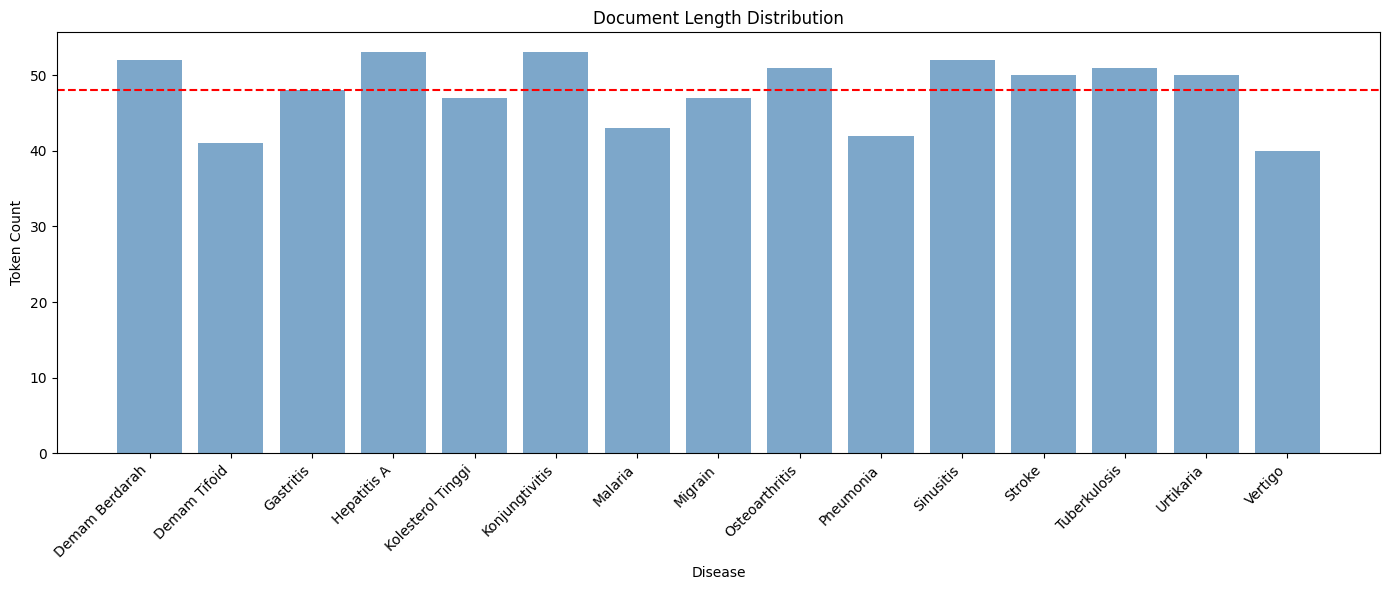

In [24]:
doc_lengths = [doc['token_count'] for doc in documents]
disease_names = [doc['disease_name'] for doc in documents]

plt.figure(figsize=(14, 6))
plt.bar(range(len(documents)), doc_lengths, color='steelblue', alpha=0.7)
plt.xlabel('Disease')
plt.ylabel('Token Count')
plt.title('Document Length Distribution')
plt.xticks(range(len(documents)), disease_names, rotation=45, ha='right')
plt.axhline(y=np.mean(doc_lengths), color='red', linestyle='--')
plt.tight_layout()
plt.show()

In [25]:
for doc in documents[:3]:
    token_freq = Counter(doc['tokens'])
    top_10 = token_freq.most_common(10)
    print(f"\n{'='*80}")
    print(f"{doc['disease_name']} - Top 10 Tokens")
    print(f"{'='*80}")
    for rank, (token, freq) in enumerate(top_10, 1):
        print(f"  {rank:2d}. {token:<20} : {freq:3d}")


Demam Berdarah - Top 10 Tokens
   1. demam                :   2
   2. sakit                :   2
   3. nyeri                :   2
   4. tinggi               :   1
   5. dadak                :   1
   6. kepala               :   1
   7. hebat                :   1
   8. belakang             :   1
   9. mata                 :   1
  10. otot                 :   1

Demam Tifoid - Top 10 Tokens
   1. cerna                :   2
   2. makan                :   2
   3. demam                :   1
   4. tinggi               :   1
   5. panjang              :   1
   6. sakit                :   1
   7. kepala               :   1
   8. mual                 :   1
   9. muntah               :   1
  10. diare                :   1

Gastritis - Top 10 Tokens
   1. makan                :   3
   2. perut                :   2
   3. lambung              :   2
   4. obat                 :   2
   5. stres                :   2
   6. asam                 :   2
   7. hindar               :   2
   8. nyeri         

In [26]:
from boolean_ir import BooleanRetrieval
boolean_ir = BooleanRetrieval(documents)

In [27]:
boolean_ir.get_index_stats()


INVERTED INDEX STATISTICS
Vocabulary size: 349
Number of diseases: 15
Average posting list length: 1.84
Max posting list length: 15
Min posting list length: 1

Top 10 most common symptoms/terms:
  rekomendasi: appears in 15 disease(s)
  hindar: appears in 11 disease(s)
  obat: appears in 11 disease(s)
  nyeri: appears in 10 disease(s)
  istirahat: appears in 9 disease(s)
  sakit: appears in 8 disease(s)
  infeksi: appears in 8 disease(s)
  muntah: appears in 7 disease(s)
  tinggi: appears in 7 disease(s)
  mual: appears in 7 disease(s)



In [28]:
boolean_ir.show_incidence_matrix(max_terms=15, max_docs=10)


INCIDENCE MATRIX (Term-Document)
Term                Demam_Berd  Demam_Tifo  Gastritis   Hepatitis_  Kolesterol  Konjungtiv  Malaria     Migrain     Osteoarthr  Pneumonia   
----------------------------------------------------------------------------------------------------
act                 0           0           0           0           0           0           1           0           0           0           
adang               0           0           1           0           0           1           0           0           0           0           
aedes               1           0           0           0           0           0           0           0           0           0           
aegypti             1           0           0           0           0           0           0           0           0           0           
air                 1           1           0           1           0           1           0           0           0           0           
akibat             

In [29]:
result1 = boolean_ir.search("demam AND nyeri", explain=True)


🔍 BOOLEAN SEARCH: demam AND nyeri
Postfix notation: demam nyeri and

Evaluation Steps:
  1. 'demam' → 7 diseases: ['Demam_Tifoid', 'Hepatitis_A', 'Malaria', 'Pneumonia', 'Sinusitis']
  2. 'nyeri' → 10 diseases: ['Malaria', 'Migrain', 'Osteoarthritis', 'Pneumonia', 'Sinusitis']
  3. AND (intersection) → 6 diseases

📊 Result: 6 disease(s) found
  • Demam Berdarah: demam tinggi mendadak, sakit kepala hebat, nyeri di belakang mata, nyeri otot dan sendi, ruam merah, mual muntah, mimisan, gusi berdarah.
  • Demam Tifoid: demam tinggi berkepanjangan, sakit kepala, mual, muntah, diare atau sembelit, lidah kotor, nyeri perut.
  • Hepatitis A: demam, lemas, hilang nafsu makan, mual muntah, nyeri perut kanan atas, urine berwarna gelap seperti teh, mata dan kulit kuning.
  • Malaria: demam tinggi naik turun, menggigil hebat, berkeringat banyak, sakit kepala parah, mual muntah, nyeri otot, lemas.
  • Pneumonia: batuk berdahak kuning atau hijau, demam tinggi, sesak nafas, nyeri dada saat bernafas d

In [30]:
result2 = boolean_ir.search("sakit AND kepala", explain=True)


🔍 BOOLEAN SEARCH: sakit AND kepala
Postfix notation: sakit kepala and

Evaluation Steps:
  1. 'sakit' → 8 diseases: ['Demam_Tifoid', 'Malaria', 'Migrain', 'Osteoarthritis', 'Sinusitis']
  2. 'kepala' → 7 diseases: ['Demam_Tifoid', 'Malaria', 'Migrain', 'Sinusitis', 'Vertigo']
  3. AND (intersection) → 6 diseases

📊 Result: 6 disease(s) found
  • Demam Berdarah: demam tinggi mendadak, sakit kepala hebat, nyeri di belakang mata, nyeri otot dan sendi, ruam merah, mual muntah, mimisan, gusi berdarah.
  • Demam Tifoid: demam tinggi berkepanjangan, sakit kepala, mual, muntah, diare atau sembelit, lidah kotor, nyeri perut.
  • Malaria: demam tinggi naik turun, menggigil hebat, berkeringat banyak, sakit kepala parah, mual muntah, nyeri otot, lemas.
  • Migrain: sakit kepala sebelah berdenyut, mual muntah, sensitif terhadap cahaya dan suara, pandangan buram, pusing.
  • Sinusitis: nyeri wajah terutama di dahi hidung dan pipi, hidung tersumbat, ingus kental berwarna hijau atau kuning, sakit kep

In [31]:
result3 = boolean_ir.search("mual OR muntah", explain=True)


🔍 BOOLEAN SEARCH: mual OR muntah
Postfix notation: mual muntah or

Evaluation Steps:
  1. 'mual' → 7 diseases: ['Demam_Tifoid', 'Hepatitis_A', 'Malaria', 'Migrain', 'Vertigo']
  2. 'muntah' → 7 diseases: ['Demam_Tifoid', 'Hepatitis_A', 'Malaria', 'Migrain', 'Vertigo']
  3. OR (union) → 7 diseases

📊 Result: 7 disease(s) found
  • Demam Berdarah: demam tinggi mendadak, sakit kepala hebat, nyeri di belakang mata, nyeri otot dan sendi, ruam merah, mual muntah, mimisan, gusi berdarah.
  • Demam Tifoid: demam tinggi berkepanjangan, sakit kepala, mual, muntah, diare atau sembelit, lidah kotor, nyeri perut.
  • Gastritis: nyeri ulu hati, perut kembung, mual, muntah, nafsu makan berkurang, sendawa berlebihan, rasa tidak nyaman di perut.
  • Hepatitis A: demam, lemas, hilang nafsu makan, mual muntah, nyeri perut kanan atas, urine berwarna gelap seperti teh, mata dan kulit kuning.
  • Malaria: demam tinggi naik turun, menggigil hebat, berkeringat banyak, sakit kepala parah, mual muntah, nyeri o

In [33]:
symptoms = ['demam', 'lemas', 'pusing']
result_symptoms = boolean_ir.search_by_symptoms(symptoms, operator="OR", explain=True)



🔍 BOOLEAN SEARCH: demam OR lemas OR pusing
Postfix notation: demam lemas or pusing or

Evaluation Steps:
  1. 'demam' → 7 diseases: ['Demam_Tifoid', 'Hepatitis_A', 'Malaria', 'Pneumonia', 'Sinusitis']
  2. 'lemas' → 4 diseases: ['Hepatitis_A', 'Malaria', 'Pneumonia', 'Tuberkulosis']
  3. OR (union) → 7 diseases
  4. 'pusing' → 3 diseases: ['Migrain', 'Stroke', 'Vertigo']
  5. OR (union) → 10 diseases

📊 Result: 10 disease(s) found
  • Demam Berdarah: demam tinggi mendadak, sakit kepala hebat, nyeri di belakang mata, nyeri otot dan sendi, ruam merah, mual muntah, mimisan, gusi berdarah.
  • Demam Tifoid: demam tinggi berkepanjangan, sakit kepala, mual, muntah, diare atau sembelit, lidah kotor, nyeri perut.
  • Hepatitis A: demam, lemas, hilang nafsu makan, mual muntah, nyeri perut kanan atas, urine berwarna gelap seperti teh, mata dan kulit kuning.
  • Malaria: demam tinggi naik turun, menggigil hebat, berkeringat banyak, sakit kepala parah, mual muntah, nyeri otot, lemas.
  • Migrain:

In [34]:
test_queries = [
    {'query': 'demam AND nyeri', 'relevant': {'Demam_Berdarah', 'Demam_Tifoid', 'Malaria'}},
    {'query': 'sakit AND kepala', 'relevant': {'Migrain', 'Demam_Berdarah', 'Sinusitis'}},
    {'query': 'batuk OR sesak', 'relevant': {'Pneumonia', 'Tuberkulosis'}}
]

In [35]:
boolean_eval_results = []
for i, test in enumerate(test_queries, 1):
    print(f"\n{'='*100}")
    print(f"Test Case {i}")
    print(f"{'='*100}")
    eval_result = boolean_ir.evaluate(test['query'], test['relevant'])
    boolean_eval_results.append(eval_result)


Test Case 1

🔍 BOOLEAN SEARCH: demam AND nyeri
Postfix notation: demam nyeri and

📊 Result: 6 disease(s) found
  • Demam Berdarah: demam tinggi mendadak, sakit kepala hebat, nyeri di belakang mata, nyeri otot dan sendi, ruam merah, mual muntah, mimisan, gusi berdarah.
  • Demam Tifoid: demam tinggi berkepanjangan, sakit kepala, mual, muntah, diare atau sembelit, lidah kotor, nyeri perut.
  • Hepatitis A: demam, lemas, hilang nafsu makan, mual muntah, nyeri perut kanan atas, urine berwarna gelap seperti teh, mata dan kulit kuning.
  • Malaria: demam tinggi naik turun, menggigil hebat, berkeringat banyak, sakit kepala parah, mual muntah, nyeri otot, lemas.
  • Pneumonia: batuk berdahak kuning atau hijau, demam tinggi, sesak nafas, nyeri dada saat bernafas dalam, menggigil, lemas.
  • Sinusitis: nyeri wajah terutama di dahi hidung dan pipi, hidung tersumbat, ingus kental berwarna hijau atau kuning, sakit kepala, demam ringan, batuk, bau mulut.


EVALUATION RESULTS
Query: demam AND nyeri


In [36]:
print("\n" + "="*100)
print("BOOLEAN RETRIEVAL - EVALUATION SUMMARY")
print("="*100)
avg_precision = np.mean([r['precision'] for r in boolean_eval_results])
avg_recall = np.mean([r['recall'] for r in boolean_eval_results])
avg_f1 = np.mean([r['f1'] for r in boolean_eval_results])
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")
print("="*100)


BOOLEAN RETRIEVAL - EVALUATION SUMMARY
Average Precision: 0.5556
Average Recall: 1.0000
Average F1-Score: 0.7111


In [37]:
from vsm_ir import VSMRetrieval
from preprocess import preprocess
vsm = VSMRetrieval(documents, weighting_scheme="tfidf")

✅ VSM initialized with 15 documents
   Vocabulary size: 349
   Weighting scheme: tfidf


In [38]:
vsm.get_term_statistics()


📊 TERM STATISTICS

Top 10 terms by IDF (most discriminative):
  act                  IDF: 3.0794, DF: 1
  aedes                IDF: 3.0794, DF: 1
  aegypti              IDF: 3.0794, DF: 1
  aktivitas            IDF: 3.0794, DF: 1
  akut                 IDF: 3.0794, DF: 1
  alergen              IDF: 3.0794, DF: 1
  anggota              IDF: 3.0794, DF: 1
  anopheles            IDF: 3.0794, DF: 1
  antiemetik           IDF: 3.0794, DF: 1
  antihistamin         IDF: 3.0794, DF: 1

Top 10 terms by DF (most common):
  rekomendasi          DF: 15, IDF: 1.0000
  hindar               DF: 11, IDF: 1.2877
  obat                 DF: 11, IDF: 1.2877
  nyeri                DF: 10, IDF: 1.3747
  istirahat            DF: 9, IDF: 1.4700
  sakit                DF: 8, IDF: 1.5754
  infeksi              DF: 8, IDF: 1.5754
  muntah               DF: 7, IDF: 1.6931
  tinggi               DF: 7, IDF: 1.6931
  mual                 DF: 7, IDF: 1.6931



In [39]:
vsm.get_vector_stats()


📊 VECTOR STATISTICS
Vector dimension: 349
Number of vectors: 15
Sparsity: 87.74%
Average non-zero elements per vector: 42.80



In [40]:
query1 = "demam tinggi nyeri kepala"
query1_tokens = preprocess(query1, use_stemming=True)
results1 = vsm.search(query1_tokens, top_k=5, explain=True)


🔍 VSM SEARCH: demam tinggi nyeri kepala
Weighting scheme: tfidf
Top 5 results:

1. Demam Berdarah (score: 0.2623)
   Gejala: demam tinggi mendadak, sakit kepala hebat, nyeri di belakang mata, nyeri otot da...
   Matching terms: demam, kepala, nyeri, tinggi

2. Malaria (score: 0.2498)
   Gejala: demam tinggi naik turun, menggigil hebat, berkeringat banyak, sakit kepala parah...
   Matching terms: demam, kepala, nyeri, tinggi

3. Demam Tifoid (score: 0.2017)
   Gejala: demam tinggi berkepanjangan, sakit kepala, mual, muntah, diare atau sembelit, li...
   Matching terms: demam, kepala, nyeri, tinggi

4. Pneumonia (score: 0.1844)
   Gejala: batuk berdahak kuning atau hijau, demam tinggi, sesak nafas, nyeri dada saat ber...
   Matching terms: demam, nyeri, tinggi

5. Tuberkulosis (score: 0.1396)
   Gejala: batuk berdahak lebih dari tiga minggu, batuk berdarah, demam tidak terlalu tingg...
   Matching terms: demam, tinggi




In [41]:
query2 = "batuk sesak nafas demam"
query2_tokens = preprocess(query2, use_stemming=True)
results2 = vsm.search(query2_tokens, top_k=5, explain=True)


🔍 VSM SEARCH: batuk sesak nafas demam
Weighting scheme: tfidf
Top 5 results:

1. Pneumonia (score: 0.4326)
   Gejala: batuk berdahak kuning atau hijau, demam tinggi, sesak nafas, nyeri dada saat ber...
   Matching terms: batuk, demam, nafas, sesak

2. Tuberkulosis (score: 0.1428)
   Gejala: batuk berdahak lebih dari tiga minggu, batuk berdarah, demam tidak terlalu tingg...
   Matching terms: batuk, demam

3. Sinusitis (score: 0.0744)
   Gejala: nyeri wajah terutama di dahi hidung dan pipi, hidung tersumbat, ingus kental ber...
   Matching terms: batuk, demam

4. Malaria (score: 0.0662)
   Gejala: demam tinggi naik turun, menggigil hebat, berkeringat banyak, sakit kepala parah...
   Matching terms: demam

5. Demam Berdarah (score: 0.0609)
   Gejala: demam tinggi mendadak, sakit kepala hebat, nyeri di belakang mata, nyeri otot da...
   Matching terms: demam




In [42]:
if results1:
    top_doc = results1[0][0]
    vsm.explain_document_score(query1_tokens, top_doc)


📊 SCORE EXPLANATION: Demam Berdarah
Cosine Similarity: 0.2623

Term-by-term contribution:
Term            Query Weight    Doc Weight      Contribution   
----------------------------------------------------------------------------------------------------
demam           1.6931          3.3863          5.7335         
nyeri           1.3747          2.7494          3.7796         
tinggi          1.6931          1.6931          2.8667         
kepala          1.6931          1.6931          2.8667         



In [43]:
from eval import evaluate_ranking, precision_at_k, recall_at_k, f1_at_k

In [44]:
test_vsm = [
    {'query': 'demam tinggi nyeri', 'relevant': {'Demam_Berdarah', 'Demam_Tifoid', 'Malaria'}},
    {'query': 'sakit kepala pusing', 'relevant': {'Migrain', 'Vertigo', 'Sinusitis'}},
    {'query': 'batuk sesak nafas', 'relevant': {'Pneumonia', 'Tuberkulosis'}}
]

In [45]:
vsm_eval_results = []
for i, test in enumerate(test_vsm, 1):
    query_tokens = preprocess(test['query'], use_stemming=True)
    results = vsm.search(query_tokens, top_k=10, explain=False)
    eval_result = evaluate_ranking(results, test['relevant'], k_values=[3, 5, 10])
    print(f"\n{'='*100}")
    print(f"VSM Test Case {i}: {test['query']}")
    print(f"{'='*100}")
    print(f"Top-5 results: {[doc_id for doc_id, _ in results[:5]]}")
    print(f"Relevant (gold): {sorted(test['relevant'])}")
    print(f"\nMetrics:")
    for metric, value in eval_result['metrics'].items():
        print(f"  {metric}: {value:.4f}")
    vsm_eval_results.append(eval_result)


VSM Test Case 1: demam tinggi nyeri
Top-5 results: ['Demam_Berdarah', 'Malaria', 'Pneumonia', 'Demam_Tifoid', 'Tuberkulosis']
Relevant (gold): ['Demam_Berdarah', 'Demam_Tifoid', 'Malaria']

Metrics:
  P@3: 0.6667
  R@3: 0.6667
  F1@3: 0.6667
  P@5: 0.6000
  R@5: 1.0000
  F1@5: 0.7500
  P@10: 0.3000
  R@10: 1.0000
  F1@10: 0.4615
  AP: 0.9167

VSM Test Case 2: sakit kepala pusing
Top-5 results: ['Migrain', 'Stroke', 'Malaria', 'Vertigo', 'Demam_Berdarah']
Relevant (gold): ['Migrain', 'Sinusitis', 'Vertigo']

Metrics:
  P@3: 0.3333
  R@3: 0.3333
  F1@3: 0.3333
  P@5: 0.4000
  R@5: 0.6667
  F1@5: 0.5000
  P@10: 0.3000
  R@10: 1.0000
  F1@10: 0.4615
  AP: 0.6429

VSM Test Case 3: batuk sesak nafas
Top-5 results: ['Pneumonia', 'Tuberkulosis', 'Sinusitis', 'Demam_Berdarah', 'Demam_Tifoid']
Relevant (gold): ['Pneumonia', 'Tuberkulosis']

Metrics:
  P@3: 0.6667
  R@3: 1.0000
  F1@3: 0.8000
  P@5: 0.4000
  R@5: 1.0000
  F1@5: 0.5714
  P@10: 0.2000
  R@10: 1.0000
  F1@10: 0.3333
  AP: 1.0000


In [46]:
print("\n" + "="*100)
print("VSM - EVALUATION SUMMARY")
print("="*100)
avg_p5 = np.mean([r['metrics']['P@5'] for r in vsm_eval_results])
avg_r5 = np.mean([r['metrics']['R@5'] for r in vsm_eval_results])
avg_f1_5 = np.mean([r['metrics']['F1@5'] for r in vsm_eval_results])
avg_ap = np.mean([r['metrics']['AP'] for r in vsm_eval_results])
print(f"Average P@5: {avg_p5:.4f}")
print(f"Average R@5: {avg_r5:.4f}")
print(f"Average F1@5: {avg_f1_5:.4f}")
print(f"Average AP (MAP): {avg_ap:.4f}")
print("="*100)


VSM - EVALUATION SUMMARY
Average P@5: 0.4667
Average R@5: 0.8889
Average F1@5: 0.6071
Average AP (MAP): 0.8532


In [47]:
query_test = "demam tinggi nyeri kepala"
query_test_tokens = preprocess(query_test, use_stemming=True)
relevant_docs = {'Demam_Berdarah', 'Demam_Tifoid', 'Malaria'}
comparison_results = vsm.compare_weighting_schemes(query_test_tokens, relevant_docs, k=10)


🔬 COMPARING WEIGHTING SCHEMES
Query: demam tinggi nyeri kepala
Relevant docs (gold): ['Demam_Berdarah', 'Demam_Tifoid', 'Malaria']

✅ VSM initialized with 15 documents
   Vocabulary size: 349
   Weighting scheme: tfidf
TFIDF:
  Top results: ['Demam_Berdarah', 'Malaria', 'Demam_Tifoid', 'Pneumonia', 'Tuberkulosis']
  P@10: 0.3000, R@10: 1.0000, F1@10: 0.4615, AP: 1.0000

✅ VSM initialized with 15 documents
   Vocabulary size: 349
   Weighting scheme: tfidf_sublinear
TFIDF_SUBLINEAR:
  Top results: ['Malaria', 'Demam_Berdarah', 'Demam_Tifoid', 'Pneumonia', 'Hepatitis_A']
  P@10: 0.3000, R@10: 1.0000, F1@10: 0.4615, AP: 1.0000

✅ VSM initialized with 15 documents
   Vocabulary size: 349
   Weighting scheme: bm25
BM25:
  Top results: ['Malaria', 'Demam_Berdarah', 'Demam_Tifoid', 'Pneumonia', 'Hepatitis_A']
  P@10: 0.3000, R@10: 1.0000, F1@10: 0.4615, AP: 1.0000

🏆 Best scheme (by F1@10): TFIDF



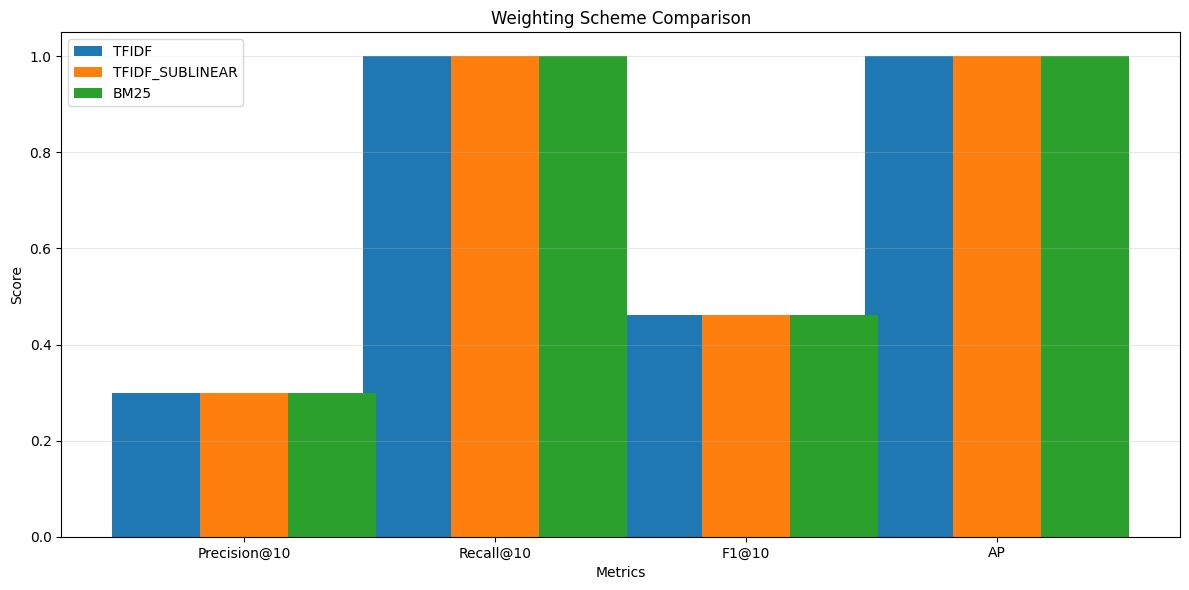

In [49]:
schemes = list(comparison_results.keys())
metrics = ['precision@k', 'recall@k', 'f1@k', 'average_precision']
metric_names = ['Precision@10', 'Recall@10', 'F1@10', 'AP']

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(metric_names))
width = 0.35

for i, scheme in enumerate(schemes):
    values = [comparison_results[scheme][m] for m in metrics]
    offset = (i - len(schemes)/2 + 0.5) * width
    ax.bar(x + offset, values, width, label=scheme.upper())

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Weighting Scheme Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [52]:
from search import MedicalSearchEngine
engine = MedicalSearchEngine(DATA_DIR, weighting_scheme="tfidf")


🏥 INITIALIZING MEDICAL SEARCH ENGINE
Data directory: c:\Users\adyya\Documents\searchpenyakitapp\data
Weighting scheme: tfidf
Found 15 disease documents in c:\Users\adyya\Documents\searchpenyakitapp\data
Processing [1/15]: Demam_Berdarah.txt
Processing [2/15]: Demam_Tifoid.txt
Processing [3/15]: Gastritis.txt
Processing [4/15]: Hepatitis_A.txt
Processing [5/15]: Kolesterol_Tinggi.txt
Processing [6/15]: Konjungtivitis.txt
Processing [7/15]: Malaria.txt
Processing [8/15]: Migrain.txt
Processing [9/15]: Osteoarthritis.txt
Processing [10/15]: Pneumonia.txt
Processing [11/15]: Sinusitis.txt
Processing [12/15]: Stroke.txt
Processing [13/15]: Tuberkulosis.txt
Processing [14/15]: Urtikaria.txt
Processing [15/15]: Vertigo.txt

Successfully processed 15 documents
✅ VSM initialized with 15 documents
   Vocabulary size: 349
   Weighting scheme: tfidf

✅ Search engine ready!
   Total diseases indexed: 15



In [53]:
symptoms = ['demam', 'batuk', 'lemas']
result = engine.search_by_symptoms(symptoms, model="vsm", top_k=5)


🔍 SYMPTOM-BASED SEARCH
Symptoms: ['demam', 'batuk', 'lemas']
Model: VSM
Preprocessed tokens: ['demam', 'batuk', 'lemas']


🔍 VSM SEARCH: demam batuk lemas
Weighting scheme: tfidf
Top 5 results:

1. Tuberkulosis (score: 0.2735)
   Gejala: batuk berdahak lebih dari tiga minggu, batuk berdarah, demam tidak terlalu tingg...
   Matching terms: batuk, demam, lemas

2. Pneumonia (score: 0.2520)
   Gejala: batuk berdahak kuning atau hijau, demam tinggi, sesak nafas, nyeri dada saat ber...
   Matching terms: batuk, demam, lemas

3. Malaria (score: 0.1733)
   Gejala: demam tinggi naik turun, menggigil hebat, berkeringat banyak, sakit kepala parah...
   Matching terms: demam, lemas

4. Hepatitis A (score: 0.1098)
   Gejala: demam, lemas, hilang nafsu makan, mual muntah, nyeri perut kanan atas, urine ber...
   Matching terms: demam, lemas

5. Sinusitis (score: 0.1073)
   Gejala: nyeri wajah terutama di dahi hidung dan pipi, hidung tersumbat, ingus kental ber...
   Matching terms: batuk, demam





In [54]:
test_queries_comparison = [
    {'query': 'demam AND nyeri', 'relevant': {'Demam_Berdarah', 'Demam_Tifoid', 'Malaria'}},
    {'query': 'sakit AND kepala', 'relevant': {'Migrain', 'Sinusitis'}},
    {'query': 'batuk OR sesak', 'relevant': {'Pneumonia', 'Tuberkulosis'}}
]

comparison = engine.compare_models(test_queries_comparison, k=10)


🔬 COMPARING BOOLEAN vs VSM


🔍 BOOLEAN SEARCH: demam AND nyeri
Postfix notation: demam nyeri and

📊 Result: 6 disease(s) found
  • Demam Berdarah: demam tinggi mendadak, sakit kepala hebat, nyeri di belakang mata, nyeri otot dan sendi, ruam merah, mual muntah, mimisan, gusi berdarah.
  • Demam Tifoid: demam tinggi berkepanjangan, sakit kepala, mual, muntah, diare atau sembelit, lidah kotor, nyeri perut.
  • Hepatitis A: demam, lemas, hilang nafsu makan, mual muntah, nyeri perut kanan atas, urine berwarna gelap seperti teh, mata dan kulit kuning.
  • Malaria: demam tinggi naik turun, menggigil hebat, berkeringat banyak, sakit kepala parah, mual muntah, nyeri otot, lemas.
  • Pneumonia: batuk berdahak kuning atau hijau, demam tinggi, sesak nafas, nyeri dada saat bernafas dalam, menggigil, lemas.
  • Sinusitis: nyeri wajah terutama di dahi hidung dan pipi, hidung tersumbat, ingus kental berwarna hijau atau kuning, sakit kepala, demam ringan, batuk, bau mulut.


🔍 BOOLEAN SEARCH: sakit AN

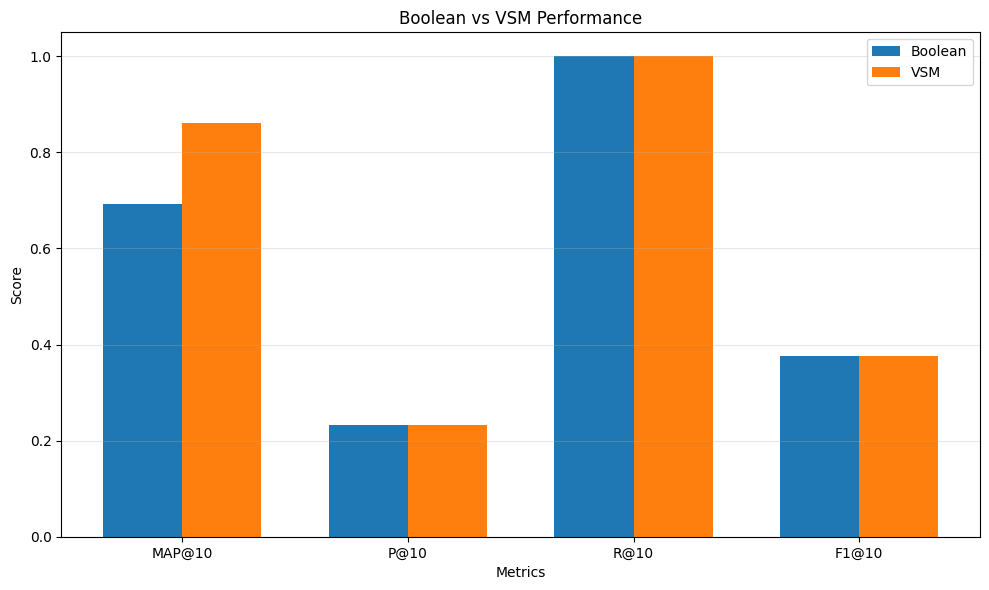

In [56]:
models = list(comparison.keys())
metrics_comp = ['MAP@10', 'P@10', 'R@10', 'F1@10']

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics_comp))
width = 0.35

for i, model in enumerate(models):
    values = [comparison[model][m] for m in metrics_comp]
    offset = (i - len(models)/2 + 0.5) * width
    ax.bar(x + offset, values, width, label=model)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Boolean vs VSM Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics_comp)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [57]:
engine.get_statistics()


📊 SEARCH ENGINE STATISTICS

🔹 BOOLEAN RETRIEVAL:

INVERTED INDEX STATISTICS
Vocabulary size: 349
Number of diseases: 15
Average posting list length: 1.84
Max posting list length: 15
Min posting list length: 1

Top 10 most common symptoms/terms:
  rekomendasi: appears in 15 disease(s)
  hindar: appears in 11 disease(s)
  obat: appears in 11 disease(s)
  nyeri: appears in 10 disease(s)
  istirahat: appears in 9 disease(s)
  sakit: appears in 8 disease(s)
  infeksi: appears in 8 disease(s)
  muntah: appears in 7 disease(s)
  tinggi: appears in 7 disease(s)
  mual: appears in 7 disease(s)


🔹 VECTOR SPACE MODEL:

📊 TERM STATISTICS

Top 10 terms by IDF (most discriminative):
  act                  IDF: 3.0794, DF: 1
  aedes                IDF: 3.0794, DF: 1
  aegypti              IDF: 3.0794, DF: 1
  aktivitas            IDF: 3.0794, DF: 1
  akut                 IDF: 3.0794, DF: 1
  alergen              IDF: 3.0794, DF: 1
  anggota              IDF: 3.0794, DF: 1
  anopheles            IDF